In [14]:
# using logistic regression

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

df = pd.read_csv('./healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [15]:
# dropping the unwanted id column

df.drop('id', axis = 1, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [16]:
#data cleanup

def change(col):
    if col == 'Male':
        return 0
    elif col =='Female':
        return 1
    else:
        return 2

df['gender'] = df['gender'].apply(change)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [17]:
def clean_married(col):
    if col == 'Yes':
        return 1
    else:
        return 0
        
df['ever_married'] = df['ever_married'].apply(clean_married)
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


In [18]:
def clean_work_type(col):
    if col == 'Private':
        return 0
    elif col == 'Self-employed':
        return 1
    elif col == 'Govt_job':
        return 2
    elif col == 'children':
        return 3
    else:
        return 4

df['work_type'] = df['work_type'].apply(clean_work_type)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,Urban,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,1,1,Rural,202.21,NaN,never smoked,1
2,0,80.0,0,1,1,0,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,1,0,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,1,1,Rural,174.12,24.0,never smoked,1


In [19]:
def clean_residence_type(col):
    if col == 'Urban':
        return 1
    else:
        return 0
        
df['Residence_type'] = df['Residence_type'].apply(clean_residence_type)
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,1,1,0,202.21,NaN,never smoked,1
2,0,80.0,0,1,1,0,0,105.92,32.5,never smoked,1
3,1,49.0,0,0,1,0,1,171.23,34.4,smokes,1
4,1,79.0,1,0,1,1,0,174.12,24.0,never smoked,1


In [20]:
def clean_smoking_status(col):
    if col == 'formerly smoked':
        return 0
    elif col == 'never smoked':
        return 1
    elif col == 'smokes':
        return 2
    else: 
        return 3
    
df['smoking_status'] = df['smoking_status'].apply(clean_smoking_status)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,0,1
1,1,61.0,0,0,1,1,0,202.21,NaN,1,1
2,0,80.0,0,1,1,0,0,105.92,32.5,1,1
3,1,49.0,0,0,1,0,1,171.23,34.4,2,1
4,1,79.0,1,0,1,1,0,174.12,24.0,1,1


In [21]:
#this fills up the missing bmi values with the median of bmi

df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,0,1
1,1,61.0,0,0,1,1,0,202.21,28.1,1,1
2,0,80.0,0,1,1,0,0,105.92,32.5,1,1
3,1,49.0,0,0,1,0,1,171.23,34.4,2,1
4,1,79.0,1,0,1,1,0,174.12,24.0,1,1


In [22]:
#data is clean with good values

df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [23]:
# X is the matrix that contains all the observations with all the respective features for each one of them
# except the last one which is the label Y (that determines if the person had a stroke or not)

X = df.iloc[:, :-1].values
X

array([[  0.  ,  67.  ,   0.  , ..., 228.69,  36.6 ,   0.  ],
       [  1.  ,  61.  ,   0.  , ..., 202.21,  28.1 ,   1.  ],
       [  0.  ,  80.  ,   0.  , ..., 105.92,  32.5 ,   1.  ],
       ...,
       [  1.  ,  35.  ,   0.  , ...,  82.99,  30.6 ,   1.  ],
       [  0.  ,  51.  ,   0.  , ..., 166.29,  25.6 ,   0.  ],
       [  1.  ,  44.  ,   0.  , ...,  85.28,  26.2 ,   3.  ]])

In [79]:
# Y is an array that contains a value of either 1 or 0 that describes if the corresponding person
# from the X matrix had a stroke or not

Y = df.iloc[:, -1]
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [181]:
# split the dataset into training set and testing set, with test set size of 20%

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0, shuffle=True)

In [182]:
# standardize inputs

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [183]:
model = SVC(kernel='rbf', random_state=0, probability=True).fit(x_train, y_train)
print(model)

SVC(probability=True, random_state=0)


In [184]:
# we have to standardize the test set as well because we standardized the training set

x_test = scaler.fit_transform(x_test)

In [203]:
y_score = model.predict_proba(x_test)
y_score = y_score[:, 0]

count = 0

for i in y_score:
    if(i<0.943):
        count = count + 1
        
print(count)


y_score = np.where(y_score < 0.943, 1, 0)




102


In [204]:
y_pred = model.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [205]:
model.score(x_test, y_test)

0.9543568464730291

In [206]:
probabilities = model.predict_proba(x_test)

with np.printoptions(threshold=np.inf):
    print(probabilities)

[[0.9426923  0.0573077 ]
 [0.95200845 0.04799155]
 [0.94548576 0.05451424]
 [0.95746883 0.04253117]
 [0.94896531 0.05103469]
 [0.94602657 0.05397343]
 [0.95010043 0.04989957]
 [0.94658876 0.05341124]
 [0.94636564 0.05363436]
 [0.94258852 0.05741148]
 [0.94526304 0.05473696]
 [0.94912744 0.05087256]
 [0.94877386 0.05122614]
 [0.94263598 0.05736402]
 [0.9464107  0.0535893 ]
 [0.94563995 0.05436005]
 [0.95435222 0.04564778]
 [0.94752946 0.05247054]
 [0.94761433 0.05238567]
 [0.94659589 0.05340411]
 [0.95576933 0.04423067]
 [0.95306655 0.04693345]
 [0.94961859 0.05038141]
 [0.94785737 0.05214263]
 [0.94521056 0.05478944]
 [0.94665033 0.05334967]
 [0.95989574 0.04010426]
 [0.9463362  0.0536638 ]
 [0.95266583 0.04733417]
 [0.94095684 0.05904316]
 [0.95140265 0.04859735]
 [0.9488848  0.0511152 ]
 [0.94685351 0.05314649]
 [0.95286958 0.04713042]
 [0.9441854  0.0558146 ]
 [0.94578697 0.05421303]
 [0.94556678 0.05443322]
 [0.94724331 0.05275669]
 [0.94852783 0.05147217]
 [0.95572071 0.04427929]


In [207]:
print(classification_report(y_test, model.predict(x_test), zero_division=True))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1610
           1       1.00      0.00      0.00        77

    accuracy                           0.95      1687
   macro avg       0.98      0.50      0.49      1687
weighted avg       0.96      0.95      0.93      1687



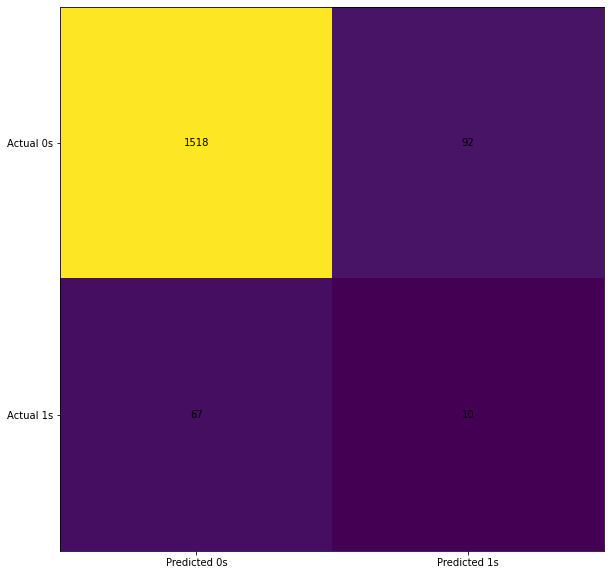

In [208]:
cm = confusion_matrix(y_test, y_score)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()